## Chua's Circuit: Analysis and Implementation
Joseph Kristofik  - Sam Smit
<table style="border: 1px solid #ffffff; width: 100%">
  <tr>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\attractiver.png)</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\cir_phys.jpg)</td>
  </tr>
  <tr>
    <td style="border:1px solid #ffffff " colspan="3"></td>
  </tr>
</table>


## Background    

In the fall of 1983, Leon Chua proposed his eponymous circuit while visiting the University of Weseda. Chua's circuit is a quintessential example of an aperiodic oscillator, both for its simplicity (can be made with easily obtainable,relatively cheap components and is relatively easy to construct) and oxymoronically complex behaviour. These factors make Chua's candidate an attractive system for studying chaotic phenomena in general. Our own investigation is presented here.

![image](files\img\chua_circ.svg.png)
Figure: 1 The vanilla Chua's circuit

## Equations & Derivation for Chua's Circuit

$$
\begin{aligned}
\text{Characteristic Circuit Equation}: && \frac{d{x}}{d{t}}=\alpha[y-x-f(x)] && \frac{d{y}}{d{t}}=\frac{x-y+Rz}{RC_2} && \frac{dz}{dt}=-\beta z \\
 \text{with:  } &&f(x)=m_0(x-m_1) \text{ if }  x \leq -E, && m_1 x  \text{ if } -1\leq x\leq 1,&&\text{ else } m_0(x-1)+m_1
\end{aligned}
$$



![image](files\img\circ_act.png)
Figure 2: An implementation of Chua's circuit which we use here. The inductor is replaced with a gyrator circuit, and the nonlinear element is represented as a negative impedance convertor.


## Implementation, Simulation, and Comparison

Below we have the raw data and simulated data for comparison. We see that the Chua system is in fact accurately portrayed by our physical model, as expected

In [39]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw python code to generate this notebook is hidden. <a href="javascript:code_toggle()">Show?</a>.''')

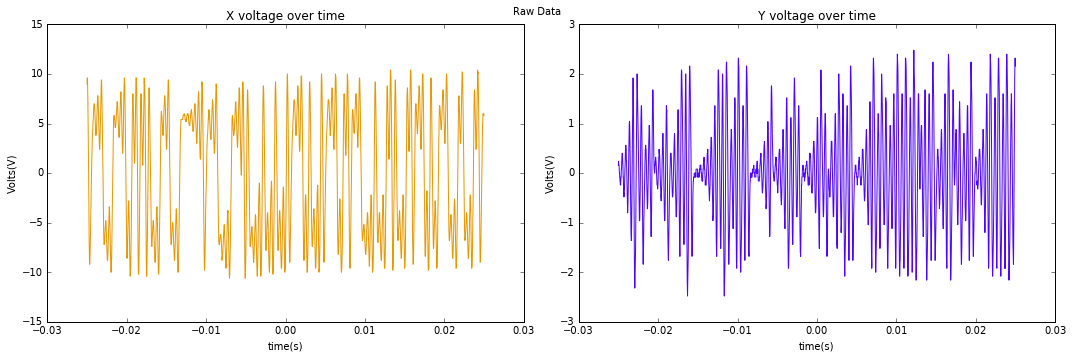

In [37]:


import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

#Arrays for data
xcor=[]
ycor=[]

#Import and dissect TDS2014B oscilloscope output

ka=[]
with open('wav/TEK0001.CSV', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        ka.append(row)
for i in range(len(ka)):
    kaw=ka[i]
    xcor.append([float(kaw[3]),float(kaw[4])])

ka2=[]
with open('wav/TEK0000.CSV', 'rt') as csvfile2:
    reader2 = csv.reader(csvfile2, delimiter=',')
    for row in reader2:
        ka2.append(row)
for i in range(len(ka2)):
    kaw2=ka2[i]
    ycor.append([float(kaw2[3]),float(kaw2[4])])
plt.rcParams['figure.figsize']=(15,5)

#Plots!
f, (ax1,ax2) = plt.subplots(1,2)
#ax1.set_axis_bgcolor(204,255,204)
ax1.plot([x for [x,y] in xcor], [y for [x,y] in xcor],color=(.9,.6,.01))
ax2.plot([x for [x,y] in ycor], [y for [x,y] in ycor],color=(.3,.02,1))

#Labels and unimportant bookkeeping bits
ax1.set_xlabel("time(s)")
ax2.set_xlabel("time(s)")
ax1.set_ylabel("Volts(V)")
ax2.set_ylabel("Volts(V)")
ax1.set_title("X voltage over time")
ax2.set_title("Y voltage over time")
f.tight_layout()
f.suptitle("Raw Data")
f.savefig("img/cir_plt.png")

In [29]:
from scipy.integrate import odeint as ode
from scipy.integrate import ode as ode2
from mpl_toolkits.mplot3d import Axes3D


def f(k):
    m = -1.2
    mm = -.7
    return (k*mm)+0.5*(m-mm)*(abs(k+2)-abs(k-2))


def chua(v,t,alpha=14.,beta=29.):
    x = v[0]
    y = v[1]
    z = v[2]
    
    dx = alpha*(y-x-f(x))
    dy = x-y+z
    dz = -beta*y
    
    return [dx,dy,dz]


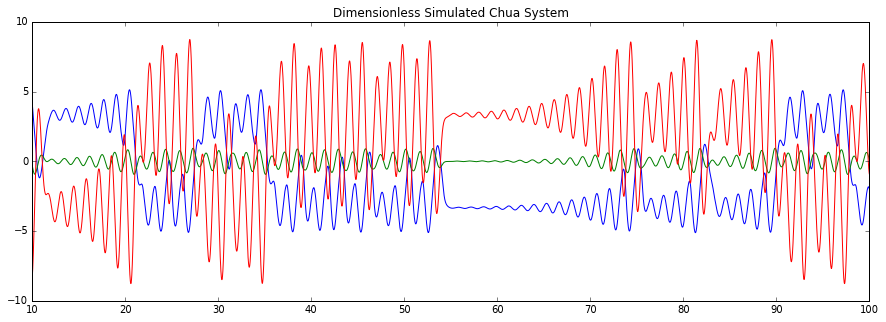

In [33]:
x0,y0,z0=[-.4,.5,-.1]

t = np.linspace(0,100,100000)
soln=ode(chua,[x0,y0,z0],t)
cut=10000
x,y,z=[soln[cut:,0],soln[cut:,1],soln[cut:,2]]
plo=plt.plot(t[cut:],x),plt.plot(t[cut:],y),plt.plot(t[cut:],z)
titl=plt.title("Dimensionless Simulated Chua System")

We see that the simulated Chua System has a very similar "pattern" to the raw oscilloscope data seen above

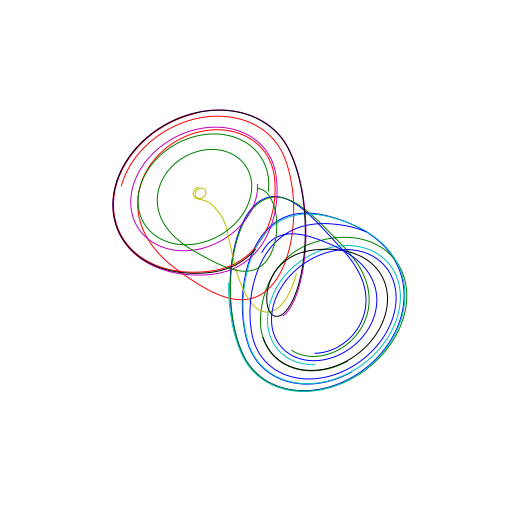

In [36]:
import numpy.random as r
fig = plt.figure(figsize=(9,9))
t = np.linspace(0,32,100000)
for k in range(9):
    x0,y0,z0=[r.randint(-2,2)+r.rand(),r.randint(-2,2)+r.rand(),r.randint(-2,2)+r.rand()]
    soln=ode(chua,[x0,y0,z0],t)
    x,y,z=[soln[cut:,0],soln[cut:,1],soln[cut:,2]]
    ax = fig.gca(projection='3d')
    plt.plot(x[:cut],y[:cut],zs=z[:cut])
    plt.axis('off')
    #plt.title('Dimensionless Simulated 3D Plot of the Chua System')
plt.savefig("img/attractive"+str(x0)+".png",bbox_inches='tight')


<table style="border: 1px solid #ffffff; width: 100%">
  <tr>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0007.BMP) A</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0010.BMP) B</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0013.BMP) C</td>
  </tr>
  <tr>
    <td style="border:1px solid #ffffff " colspan="3"> Tables A & B both show the attractor seen in Chua's circuit. Note that there is some clipping near bottom of the attractor C shows the waveform as the system approaches chaotic.</td>
  </tr>
</table>


## Applications

Besides strictly being an academic curiosity, Chua's circuit does in fact find a few useful applications. Oscillators oscillate, fairly obviously; Thus any such oscillator can easily serve as a waveform source in a synthesizer for those more artistically inclined.
A mo

[1] - E. Lorenz, “Deterministic non-periodic flows,” J. Atmos. Ser., vol. 20, pp.130-141, 1963. 

[2] - Matsumoto, Takashi (December 1984). "A Chaotic Attractor from Chua's Circuit" (PDF). IEEE Transactions on Circuits and Systems (IEEE). CAS-31 (12): 1055–1058. Retrieved 2008-05-01

[3] - Kennedy, M. P. (1993). Three steps to chaos. II. A Chua's circuit primer. Circuits and Systems I: Fundamental Theory and Applications, IEEE Transactions on, 40(10), 657-674.

[4] - Irimiciuc, Stefan-Andrei, Ovidiu Vasilovici, and Dan-Gheorghe Dimitriu. "Chua's Circuit: Control and Synchronization." International Journal of Bifurcation and Chaos 25.04 (2015): 1550050.

[5] - Cruz-Hernández, César, and Hazael Serrano-Guerrero. "Cryptosystems based on synchronized Chua’s circuits." Proceedings of the 16th IFAC world congress, Prague, Czech Republic. 2005.

[6] - Jiang, Hui-yan, and Chong Fu. "An image encryption scheme based on Lorenz chaos system." Natural Computation, 2008. ICNC'08. Fourth International Conference on. Vol. 4. IEEE, 2008.

[7] - Marco, Anderson Gonçalves, Alexandre Souto Martinez, and Odemir Martinez Bruno. "Fast, parallel and secure cryptography algorithm using Lorenz's attractor." International Journal of Modern Physics C 21.03 (2010): 365-382.
